# Affine Transformation

## Translation

Translation is the process of shifting the image along the various axes (x-, y- and z-axis)

In [1]:
!pip install scipy==1.2.0

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image 
import scipy

__matriks for Translation__

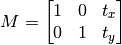

In [3]:
Image('../Figures/translation.png')

Text(0.5, 1.0, 'Input image')

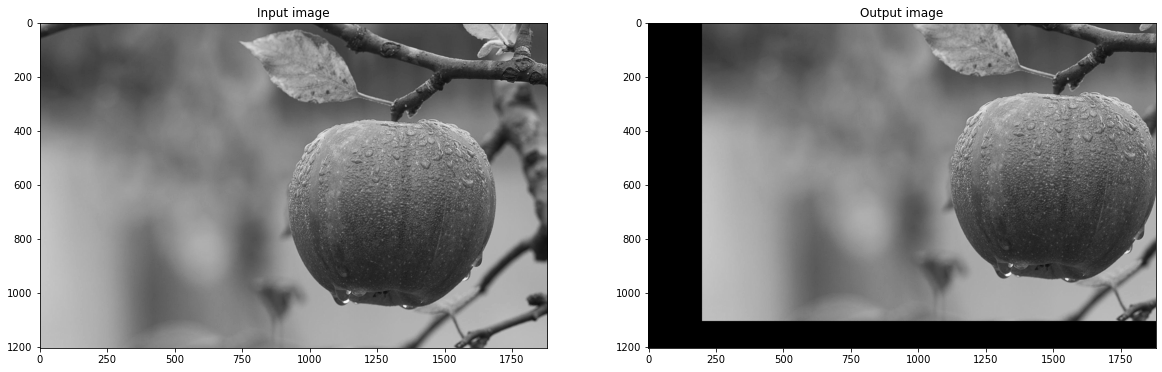

In [4]:
img = cv2.imread('../Figures/Apple.jpeg',0)
rows,cols = img.shape

M = np.float32([[1,0,200],[0,1,-100]])
dst = cv2.warpAffine(img,M,(cols,rows))
    
fig = plt.figure (figsize=(20,20))
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(dst,cmap='gray')
ax1.set_title('Output image')

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img,cmap='gray')
ax1.set_title('Input image')

## Rotation

- Rotation is the process of changing the radial orientation of an image along the various axes with respect to a fixed point.
- Rotation of an image for an angle \theta is achieved by the transformation matrix of the form

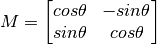

In [5]:
Image('../Figures/Rotation.png')

Text(0.5, 1.0, 'Input image')

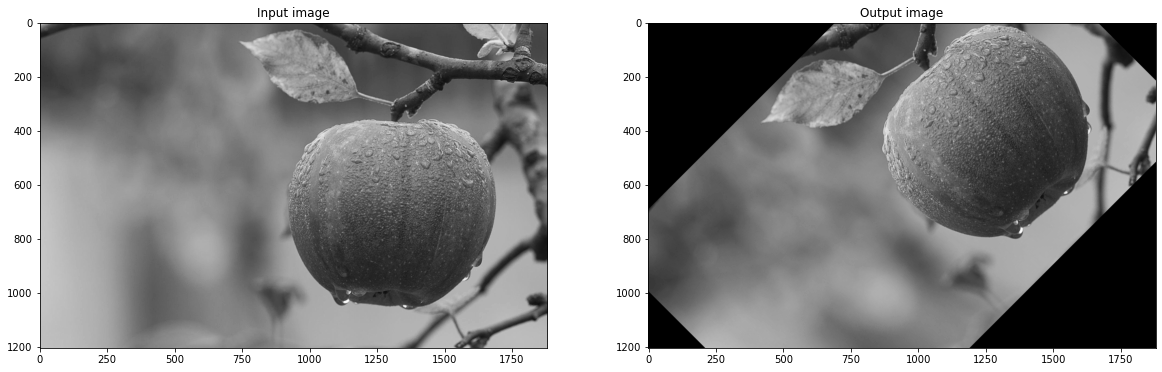

In [6]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst = cv2.warpAffine(img,M,(cols,rows))

fig = plt.figure (figsize=(20,20))
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(dst,cmap='gray')
ax1.set_title('Output image')

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img,cmap='gray')
ax1.set_title('Input image')

## Scaling

Scaling is a process of changing the distance (compression orelongation) between points in one or more axes. This change in distance causes the object in the image to appear larger or smallerthan the original input.

Text(0.5, 1.0, 'Input image')

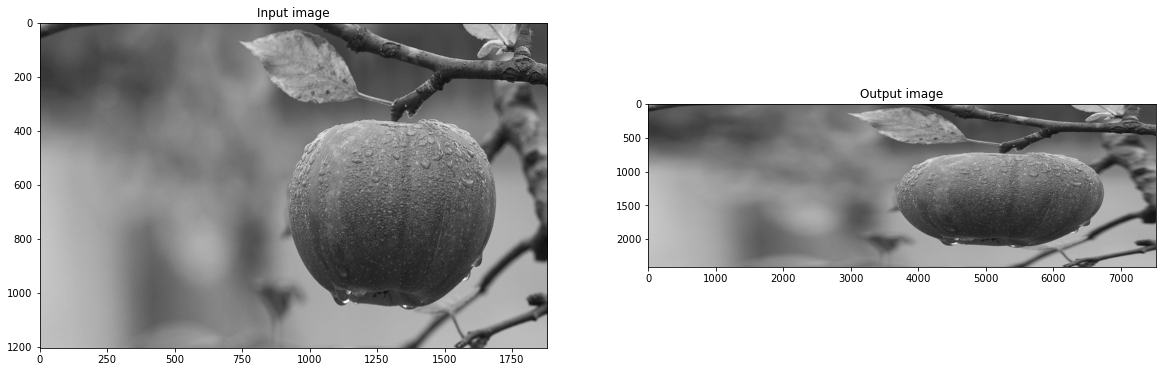

In [7]:
# res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv2.resize(img,(4*width, 2*height), interpolation = cv2.INTER_CUBIC)

fig = plt.figure (figsize=(20,20))
ax1 = fig.add_subplot(1,2,2)
ax1.imshow(res,cmap='gray')
ax1.set_title('Output image')

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img,cmap='gray')
ax1.set_title('Input image')

## Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function __cv2.getPerspectiveTransform__. Then apply __cv2.warpPerspective__ with this 3x3 transformation matrix.

## Interpolation

To understand the use of interpolation, we will first perform a thought experiment. Consider an image of size 2x2. If this image is scaled to four times its size in all linear dimensions, the new image will be of size 8x8. The original image has only 4 pixel values while the new image needs 64 pixel values.

<ipython-input-8-ecbe386eeab6>:8: DeprecationWarning: `fromimage` is deprecated!
`fromimage` is deprecated in SciPy 1.0.0. and will be removed in 1.2.0.
Use ``np.asarray(im)`` instead.
  img1 = scipy.misc.fromimage(img)


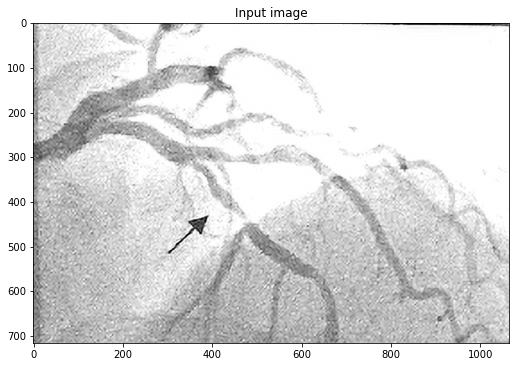

In [8]:
import numpy as np
import scipy.misc, math
from scipy.misc.pilutil import Image
from skimage.transform import AffineTransform, warp

img = Image.open('../Figures/angiogram1.png').convert('L')

img1 = scipy.misc.fromimage(img)

transformation = AffineTransform(scale=(0.3, 0.3))


fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,2,1)
ax1.imshow(img,cmap='gray')
ax1.set_title('Input image')

img = np.asanyarray(img)
img2 = warp(img, transformation, order=0)

# im4 = scipy.misc.toimage(img2)

# ax2 = fig.add_subplot(3,2,2)
# ax2.imshow(img2)
# ax2.set_title('Input image')


<ipython-input-9-0cf2b872572a>:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  im4 = scipy.misc.toimage(img2)


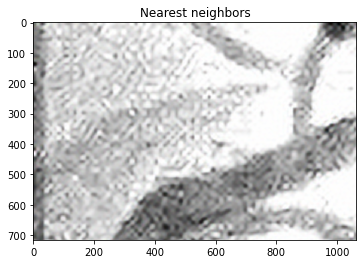

In [9]:
# nearest neighbor order = 0
img = Image.open('../Figures/angiogram1.png')

img = np.asanyarray(img)
img2 = warp(img, transformation, order=0)
im4 = scipy.misc.toimage(img2)


imgplot = plt.title('Nearest neighbors')
imgplot = plt.imshow(im4)

<ipython-input-10-dcfd6ffe957b>:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  im4 = scipy.misc.toimage(img2)


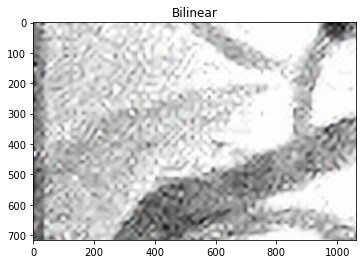

In [10]:
# bi-linear order = 1
img = Image.open('../Figures/angiogram1.png')
img = np.asanyarray(img)

img2 = warp(img, transformation, order=1) # default

im4 = scipy.misc.toimage(img2)
imgplot = plt.title('Bilinear')
imgplot = plt.imshow(im4)